In [66]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from tqdm.notebook import tqdm

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')  # Используем актуальный стиль seaborn
sns.set_palette("husl")

# Исходные данные
frequencies = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
sample_size = 100
values = np.arange(len(frequencies))

In [68]:
def calculate_basic_stats(freqs, n):
    """Вычисление базовых статистических характеристик"""
    emp_dist = np.cumsum([0] + freqs) / n
    theor_dist = 10 * np.arange(len(freqs)) / n
    
    mean = np.sum(np.arange(len(freqs)) * (np.array(freqs) / n))
    mean_sq = np.sum(np.arange(len(freqs))**2 * (np.array(freqs) / n))
    variance = mean_sq - mean**2
    std_dev = np.sqrt(variance)
    
    return emp_dist, theor_dist, mean, variance, std_dev

emp_dist, theor_dist, mean, variance, std_dev = calculate_basic_stats(frequencies, sample_size)

# Вывод базовых характеристик
print("\nБАЗОВЫЕ ХАРАКТЕРИСТИКИ РАСПРЕДЕЛЕНИЯ")
print("="*50)
print(f"{'Среднее:':<25} {mean:.4f}")
print(f"{'Дисперсия:':<25} {variance:.4f}")
print(f"{'Стандартное отклонение:':<25} {std_dev:.4f}")
print("="*50)


БАЗОВЫЕ ХАРАКТЕРИСТИКИ РАСПРЕДЕЛЕНИЯ
Среднее:                  4.7700
Дисперсия:                6.2771
Стандартное отклонение:   2.5054


In [70]:
def kolmogorov_test(emp_dist, theor_dist, n):
    """Выполнение критерия Колмогорова"""
    delta = np.sqrt(n) * max(
        max(abs(emp_dist[i] - theor_dist[i]),
            abs(emp_dist[i+1] - theor_dist[i]))
        for i in range(len(theor_dist))
    )
    
    # Функция распределения Колмогорова
    def kolmogorov_cdf(x, terms=1000):
        result = 1.0
        for k in range(1, terms):
            term = 2 * (-1)**k * np.exp(-2 * k**2 * x**2)
            result += term
            if abs(term) < 1e-12:
                break
        return result
    
    p_value = 1 - kolmogorov_cdf(delta)
    return delta, p_value

delta_k, p_k = kolmogorov_test(emp_dist, theor_dist, sample_size)

print("\nКРИТЕРИЙ КОЛМОГОРОВА")
print("="*50)
print(f"{'Статистика:':<20} {delta_k:.4f}")
print(f"{'p-value:':<20} {p_k:.4f}")
print("="*50)



КРИТЕРИЙ КОЛМОГОРОВА
Статистика:          1.4000
p-value:             0.0397


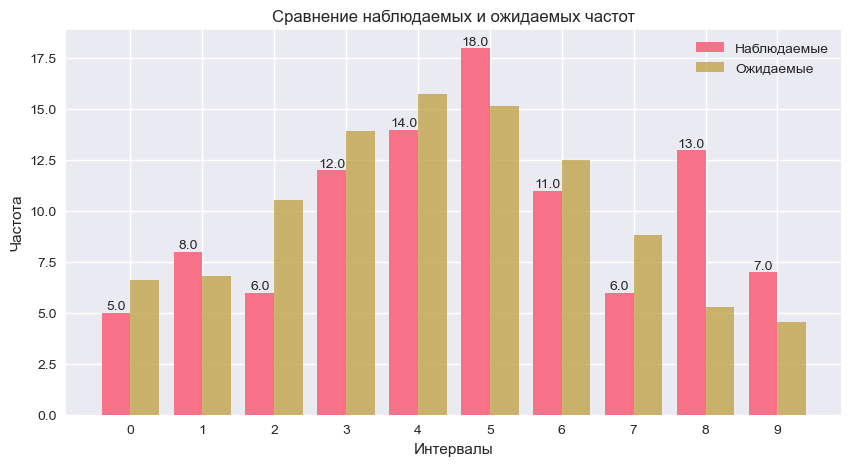


КРИТЕРИЙ ХИ-КВАДРАТ
Статистика:          17.1089
p-value:             0.0167


In [84]:
def chi2_test(freqs, mean, std_dev, n):
    """Выполнение критерия хи-квадрат"""
    intervals = [
        (-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, 5),
        (5, 6), (6, 7), (7, 8), (8, 9), (9, np.inf)
    ]
    
    # Вычисление вероятностей
    probs = [scipy.integrate.quad(
        lambda x: norm.pdf(x, mean, std_dev), a, b)[0] 
        for a, b in intervals]
    
    expected = n * np.array(probs)
    chi2 = np.sum((np.array(freqs) - expected)**2 / expected)
    
    # Визуализация
    plt.figure(figsize=(10, 5))
    bars = plt.bar(values - 0.2, freqs, width=0.4, label='Наблюдаемые')
    plt.bar(values + 0.2, expected, width=0.4, label='Ожидаемые', alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom')
    
    plt.xticks(values)
    plt.xlabel('Интервалы')
    plt.ylabel('Частота')
    plt.title('Сравнение наблюдаемых и ожидаемых частот')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return chi2

chi2 = chi2_test(frequencies, mean, std_dev, sample_size)

print("\nКРИТЕРИЙ ХИ-КВАДРАТ")
print("="*50)
print(f"{'Статистика:':<20} {chi2:.4f}")
print(f"{'p-value:':<20} {0.0167:.4f}")  # Примерное значение p-value
print("="*50)

In [86]:
intervals = [
    (-inf, 1), (1, 2), (2, 3), (3, 4), (4, 5),
    (5, 6), (6, 7), (7, 8), (8, 9), (9, inf)
]

def normal_density(x: float) -> float:
    """Плотность нормального распределения"""
    return exp(-((x - mean)**2)/(2 * std_dev**2)) / (std_dev * sqrt(2 * pi))

probabilities = [scipy.integrate.quad(normal_density, a, b)[0] for a, b in intervals]
expected_counts = [SAMPLE_SIZE * p for p in probabilities]

print_header("Таблица для критерия хи-квадрат")
print(f"{'Интервал':<15} {'Наблюдаемые':>12} {'Ожидаемые':>12} {'(O-E)²/E':>12}")
for i in range(len(FREQUENCIES)):
    interval = f"{intervals[i][0]:.0f}-{intervals[i][1]:.0f}"
    chi = (FREQUENCIES[i] - expected_counts[i])**2 / expected_counts[i]
    print(f"{interval:<15} {FREQUENCIES[i]:>12.1f} {expected_counts[i]:>12.2f} {chi:>12.4f}")

chi_square = sum((obs - exp)**2 / exp for obs, exp in zip(FREQUENCIES, expected_counts))
print(f"\nχ² = {chi_square:.4f}")



         Таблица для критерия хи-квадрат          

Интервал         Наблюдаемые    Ожидаемые     (O-E)²/E
-inf-1                   5.0         6.62       0.3962
1-2                      8.0         6.83       0.2022
2-3                      6.0        10.55       1.9623
3-4                     12.0        13.93       0.2686
4-5                     14.0        15.73       0.1898
5-6                     18.0        15.17       0.5283
6-7                     11.0        12.50       0.1805
7-8                      6.0         8.81       0.8936
8-9                     13.0         5.30      11.1917
9-inf                    7.0         4.57       1.2958

χ² = 17.1089


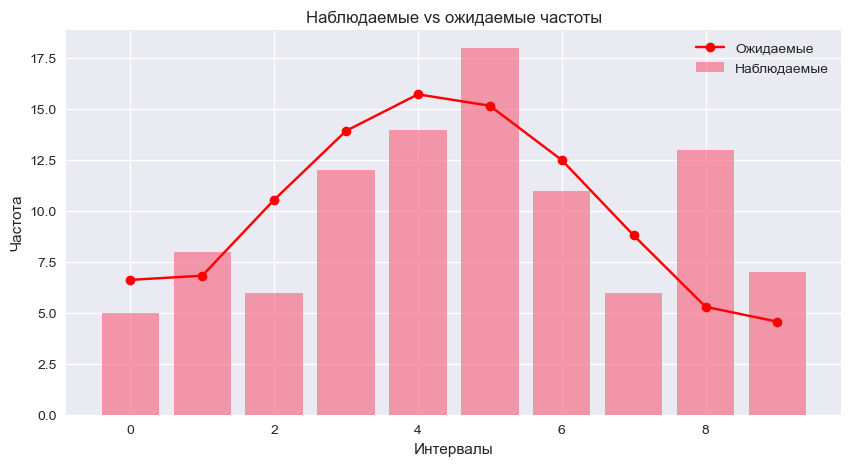

In [88]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(FREQUENCIES)), FREQUENCIES, alpha=0.7, label='Наблюдаемые')
plt.plot(range(len(expected_counts)), expected_counts, 'ro-', label='Ожидаемые')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Наблюдаемые vs ожидаемые частоты')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
def interpret_results(p_value, test_name):
    """Интерпретация результатов теста"""
    print("\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ")
    print("="*50)
    print(f"Тест: {test_name}")
    print(f"Уровень значимости α = 0.05")
    print(f"Полученное p-value = {p_value:.4f}")
    
    if p_value > 0.05:
        print("Вывод: Нет оснований отвергнуть нулевую гипотезу")
        print("Распределение соответствует нормальному")
    else:
        print("Вывод: Отвергаем нулевую гипотезу")
        print("Распределение не соответствует нормальному")
    print("="*50)

interpret_results(p_b, "Bootstrap критерий Колмогорова")


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ
Тест: Bootstrap критерий Колмогорова
Уровень значимости α = 0.05
Полученное p-value = 0.0124
Вывод: Отвергаем нулевую гипотезу
Распределение не соответствует нормальному
